<h1 style="text-align:center;font-size:40px">Data Analysis and Cleaning</h1>
### Objective: 
- To predict purchase amount of a customer given some data

In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [145]:
df = pd.read_csv('train.csv')

In [146]:
print('Shape: ', df.shape)
print('Observations: ', len(df))

Shape:  (550068, 12)
Observations:  550068


In [147]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [148]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [149]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [150]:
df.describe(include='object')

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


#### We won't treat ID's as features hence we can eclude them as feature as they do not tend to affect target, Purchase

In [151]:
df.Product_Category_1.unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19], dtype=int64)

In [152]:
df.Product_Category_2.unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [153]:
df.Product_Category_3.unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

#### We can replace nan with 0 to indicate misssing as 0 doen't represents any category

In [154]:
print('Missing in Product Category 2: {0:.2f} %'.format(df.Product_Category_2.isnull().sum()*100/len(df)))
print('Missing in Product Category 3: {0:.2f} %'.format(df.Product_Category_3.isnull().sum()*100/len(df)))

Missing in Product Category 2: 31.57 %
Missing in Product Category 3: 69.67 %


#### Since product category 3 has 69.6% missing values, we will simply drop it while cleaning

In [155]:
df = df.drop('Product_Category_3', axis = 1)
print('One column dropped!\nNew Shape:', df.shape)

One column dropped!
New Shape: (550068, 11)


In [156]:
df['Product_Category_2_Mode'] = df.Product_Category_2.fillna(8)

In [157]:
df.Product_Category_2 = df.Product_Category_2.fillna(0) #in abt1

In [158]:
corrmat = df.corr()

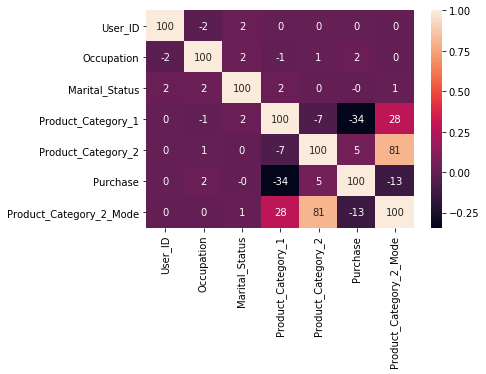

In [159]:
plt.figure(figsize=(6,4))
ax = sns.heatmap(data = corrmat, annot = corrmat*100, fmt='.0f', )
plt.show()

### Working and handling categorical data

In [160]:
df.Stay_In_Current_City_Years.value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [161]:
df.Stay_In_Current_City_Years.replace('4+', '4', inplace=True)
df.Stay_In_Current_City_Years = df.Stay_In_Current_City_Years.astype(int)

#### Converting gender to numerical i.e. encoding it.
0 = Female<br>
1 = Male

In [162]:
df.Gender.replace('F', 0, inplace=True)
df.Gender.replace('M', 1, inplace=True)

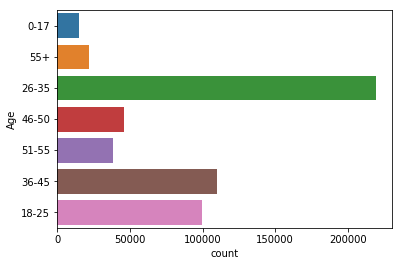

In [163]:
sns.countplot(y = 'Age', data = df)
plt.show()

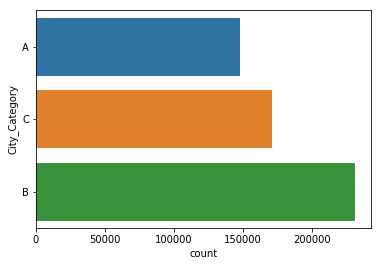

In [164]:
sns.countplot(y = 'City_Category', data = df)
plt.show()

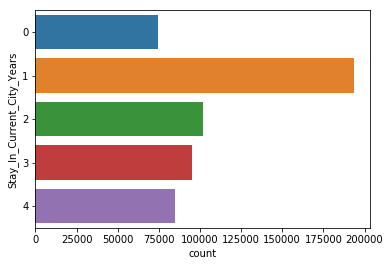

In [165]:
sns.countplot(y = 'Stay_In_Current_City_Years', data = df)
plt.show()

In [166]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                          int64
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years      int32
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Purchase                        int64
Product_Category_2_Mode       float64
dtype: object

In [167]:
target = ['Purchase']
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Purchase', 'Product_Category_2_Mode'],
      dtype='object')

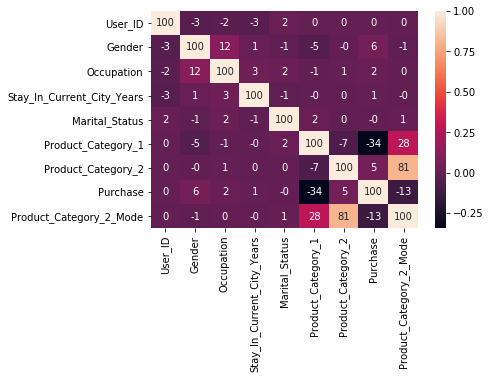

In [168]:
plt.figure(figsize=(6,4))
ax = sns.heatmap(data = df.corr(), annot = df.corr()*100, fmt='.0f', )
plt.show()

In [169]:
numerical_features1 = ['Gender', 'Product_Category_1', 'Product_Category_2_Mode', 'Purchase']
numerical_features2 = ['Gender', 'Occupation', 'Marital_Status', 
                       'Product_Category_1', 'Product_Category_2_Mode', 'Purchase']

In [170]:
categorical_features = ['Age', 'City_Category']

In [171]:
features1 = numerical_features1 #+ categorical_features
features2 = numerical_features2 + categorical_features

In [173]:
abt1 = df[pd.Index(features1)]
abt2 = df[pd.Index(features2)]

In [174]:
abt1.head()

,Gender,Product_Category_1,Product_Category_2_Mode,Purchase
0,0,3,8.0,8370
1,0,1,6.0,15200
2,0,12,8.0,1422
3,0,12,14.0,1057
4,1,8,8.0,7969


In [175]:
abt2.head()

,Gender,Occupation,Marital_Status,Product_Category_1,Product_Category_2_Mode,Purchase,Age,City_Category
0,0,10,0,3,8.0,8370,0-17,A
1,0,10,0,1,6.0,15200,0-17,A
2,0,10,0,12,8.0,1422,0-17,A
3,0,10,0,12,14.0,1057,0-17,A
4,1,16,0,8,8.0,7969,55+,C


Getting dummies and saving ABT to csv

In [176]:
#abt1 = pd.get_dummies(abt1, columns = ['City_Category'])
abt2 = pd.get_dummies(abt2, columns = ['Age', 'City_Category'])

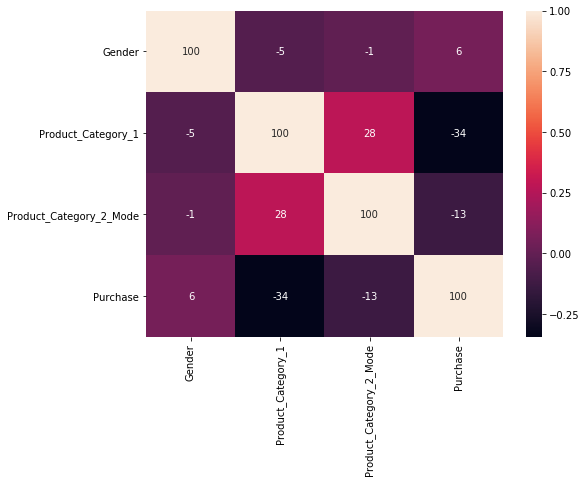

In [177]:
plt.figure(figsize=(8,6))
ax = sns.heatmap(data = abt1.corr(), annot = abt1.corr()*100, fmt='.0f', )
plt.show()

In [178]:
abt1.to_csv('5feats.csv', index=False)
abt2.to_csv('abt2.csv', index=False)

In [179]:
abt1.head()

,Gender,Product_Category_1,Product_Category_2_Mode,Purchase
0,0,3,8.0,8370
1,0,1,6.0,15200
2,0,12,8.0,1422
3,0,12,14.0,1057
4,1,8,8.0,7969


In [180]:
small = abt1.iloc[:60000, :]
small.head()

,Gender,Product_Category_1,Product_Category_2_Mode,Purchase
0,0,3,8.0,8370
1,0,1,6.0,15200
2,0,12,8.0,1422
3,0,12,14.0,1057
4,1,8,8.0,7969


In [181]:
small.to_csv('small.csv', index=False)